In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic')

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

1. mpg.csv 데이터를 사용하여 다음의 데이터 분석 요구에 답하시오. (40점)
1) cty 가 15 이상 이면서 hwy 가 26 이상인 model을 출력하시오.
2) loc 함수를 이용하여 5, 30, 180 번째 데이터를 추출하여 출력하시오.
3) 1 ~ 5 행까지를 loc, iloc 함수를 이용하여 각각 출력하시오. 그리고 그 차이를 설명하시오.
4) cyl 과 drv의 에 따른 hyw에서 연비를 상, 중 하 로 나누어 표시하시오.
   상 : 25 이상, 중 : 20 이상 하: 15이상

2. adult.csv 파일을 이용하여  (40점)
1) education 과 income 과의 유의 확률을 구하시오.
2) age, workclass, education, occupation, race, sex, income 과의 상관행렬을 구하고 출력하시오.
3) 2) 데이터에서 칼라 히트맵을 구현 하시오.
4) 3) 데이터에서 대각행렬 마스크를 적용하여 히트맵을 구현 하시오.

3. mpg.csv 데이터를 사용하여 다음의 데이터 분석 요구에 답하시오. (20점)
1) x = hwy, y = cty를 사용하여 box 차트를 그리고 출력하시오.
2) cyl 과 hwy 와의 상관계수를 구하시오.
3) disl 과 hwy 사이의 line 그래프를 그리고, 출력 하시오.

In [45]:
data = pd.read_csv("mpg.csv")

In [46]:
model = data.query('cty >= 15 & hwy >= 26')
model

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
229,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
230,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
231,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
232,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize


In [47]:
data.loc[[5, 30, 180]]

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
5,audi,a4,2.8,1999,6,manual(m5),f,18,26,p,compact
30,chevrolet,k1500 tahoe 4wd,5.7,1999,8,auto(l4),4,11,15,r,suv
180,toyota,camry,2.2,1999,4,auto(l4),f,21,27,r,midsize


In [48]:
data.loc[0:5]

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
5,audi,a4,2.8,1999,6,manual(m5),f,18,26,p,compact


In [54]:
data.iloc[0:5]

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


cyl 과 drv에 따른 hyw에서 연비를 상, 중 하 로 나누어 표시하시오.
   상 : 25 이상, 중 : 20 이상 하: 15이상

In [38]:
data['grade'] = np.where(data['hwy'] >= 25, '상', np.where(data['hwy'] >= 20, '중', '하'))
data[['cyl', 'drv', 'hwy', 'grade']]

,cyl,drv,hwy,grade
0,4,f,29,상
1,4,f,29,상
2,4,f,31,상
3,4,f,30,상
4,6,f,26,상
...,...,...,...,...
229,4,f,28,상
230,4,f,29,상
231,6,f,26,상
232,6,f,26,상


education 과 income 과의 유의 확률을 구하시오.

In [62]:
from scipy import stats

In [111]:
data2 = pd.read_csv("adult.csv")

In [77]:
data2_tmp = pd.get_dummies(data2)

In [80]:
data2_tmp

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,income_num,workclass_?,workclass_Federal-gov,workclass_Local-gov,...,native_country_Scotland,native_country_South,native_country_Taiwan,native_country_Thailand,native_country_Trinadad&Tobago,native_country_United-States,native_country_Vietnam,native_country_Yugoslavia,income_<=50K,income_>50K
0,25,226802,7,0,0,40,0,False,False,False,...,False,False,False,False,False,True,False,False,True,False
1,38,89814,9,0,0,50,0,False,False,False,...,False,False,False,False,False,True,False,False,True,False
2,28,336951,12,0,0,40,1,False,False,True,...,False,False,False,False,False,True,False,False,False,True
3,44,160323,10,7688,0,40,1,False,False,False,...,False,False,False,False,False,True,False,False,False,True
4,18,103497,10,0,0,30,0,True,False,False,...,False,False,False,False,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,257302,12,0,0,38,0,False,False,False,...,False,False,False,False,False,True,False,False,True,False
48838,40,154374,9,0,0,40,1,False,False,False,...,False,False,False,False,False,True,False,False,False,True
48839,58,151910,9,0,0,40,0,False,False,False,...,False,False,False,False,False,True,False,False,True,False
48840,22,201490,9,0,0,20,0,False,False,False,...,False,False,False,False,False,True,False,False,True,False


In [78]:
data2_tmp

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,income_num,workclass_?,workclass_Federal-gov,workclass_Local-gov,...,native_country_Scotland,native_country_South,native_country_Taiwan,native_country_Thailand,native_country_Trinadad&Tobago,native_country_United-States,native_country_Vietnam,native_country_Yugoslavia,income_<=50K,income_>50K
0,25,226802,7,0,0,40,0,False,False,False,...,False,False,False,False,False,True,False,False,True,False
1,38,89814,9,0,0,50,0,False,False,False,...,False,False,False,False,False,True,False,False,True,False
2,28,336951,12,0,0,40,1,False,False,True,...,False,False,False,False,False,True,False,False,False,True
3,44,160323,10,7688,0,40,1,False,False,False,...,False,False,False,False,False,True,False,False,False,True
4,18,103497,10,0,0,30,0,True,False,False,...,False,False,False,False,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,257302,12,0,0,38,0,False,False,False,...,False,False,False,False,False,True,False,False,True,False
48838,40,154374,9,0,0,40,1,False,False,False,...,False,False,False,False,False,True,False,False,False,True
48839,58,151910,9,0,0,40,0,False,False,False,...,False,False,False,False,False,True,False,False,True,False
48840,22,201490,9,0,0,20,0,False,False,False,...,False,False,False,False,False,True,False,False,True,False


In [82]:
stats.pearsonr(data2_tmp['education_num'], data2_tmp['income_num'])

PearsonRResult(statistic=0.33261313066614606, pvalue=0.0)

In [107]:
from sklearn.preprocessing import LabelEncoder

In [108]:
encoder = LabelEncoder()

In [125]:
data2['workclass'] = encoder.fit_transform(data2['workclass'])

In [126]:
data2['occupation'] = encoder.fit_transform(data2['occupation'])

In [127]:
data2['race'] = encoder.fit_transform(data2['race'])

In [115]:
data2['sex'] = encoder.fit_transform(data2['sex'])

In [94]:
data2 = pd.get_dummies(data2)

In [129]:
cor = data2[['age', 'workclass', 'education_num', 'occupation', 'race', 'sex', 'income_num']].corr()

In [131]:
cor

,age,workclass,education_num,occupation,race,sex,income_num
age,1.000000,0.017526,0.030940,-0.014259,0.028421,0.028421,0.230369
workclass,0.017526,1.000000,0.055918,0.260005,0.052932,0.052932,0.052674
education_num,0.030940,0.055918,1.000000,0.112265,0.029239,0.029239,0.332613
occupation,-0.014259,0.260005,0.112265,1.000000,0.005671,0.005671,0.076722
race,0.028421,0.052932,0.029239,0.005671,1.000000,1.000000,0.070934
sex,0.028421,0.052932,0.029239,0.005671,1.000000,1.000000,0.070934
income_num,0.230369,0.052674,0.332613,0.076722,0.070934,0.070934,1.000000


<Axes: >

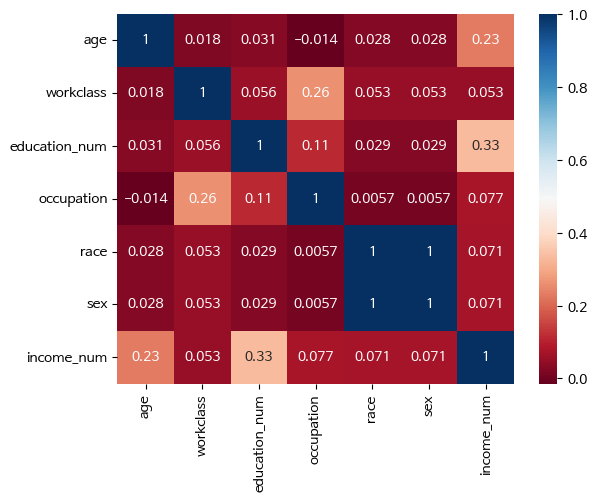

In [132]:
sns.heatmap(cor, annot = True, cmap='RdBu')

In [133]:
import numpy as np
mask = np.zeros_like(cor)
mask[np.triu_indices_from(mask)] = 1

<Axes: >

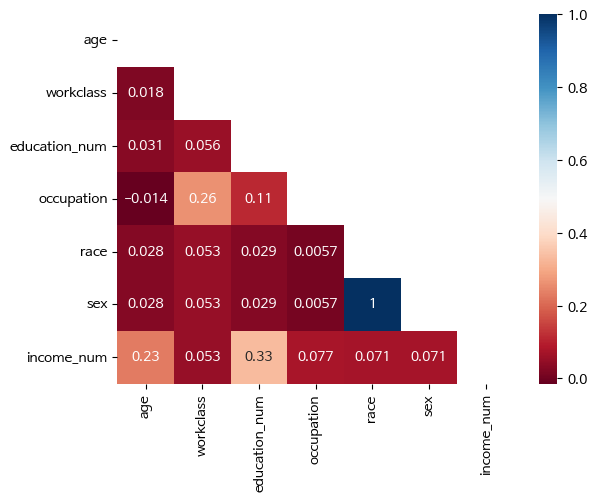

In [135]:
sns.heatmap(data = cor, annot = True, cmap = 'RdBu', mask=mask)

In [ ]:
import numpy as np
mask = np.zeros

In [ ]:
mpg.csv 데이터를 사용하여 다음의 데이터 분석 요구에 답하시오. (20점)
1) x = hwy, y = cty를 사용하여 box 차트를 그리고 출력하시오.
2) cyl 과 hwy 와의 상관계수를 구하시오.
3) disl 과 hwy 사이의 line 그래프를 그리고, 출력 하시오.

In [44]:
import pandas as pd
import seaborn as sns

In [39]:
data3 = pd.read_csv("mpg.csv")

<Axes: xlabel='hwy', ylabel='cty'>

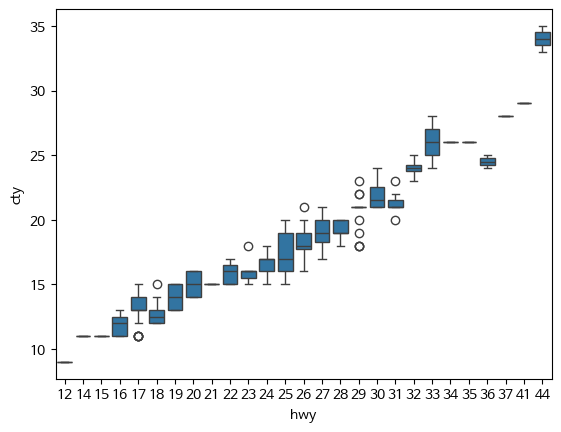

In [41]:
sns.boxplot(x = 'hwy', y = 'cty', data = data3)

In [42]:
data3[['cyl', 'hwy']].corr()

,cyl,hwy
cyl,1.000000,-0.761912
hwy,-0.761912,1.000000


<Axes: xlabel='displ', ylabel='hwy'>

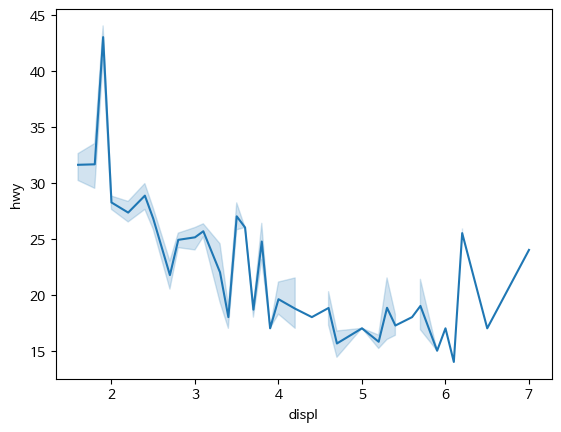

In [43]:
sns.lineplot(x = 'displ', y = 'hwy', data = data3)